In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore') # ignore the warnings

pd.set_option('display.max_columns',None) # To see all the columns in dataset

## Data Analysis

### Descriptive Analysis 

In [2]:
# Load the dataset
data = pd.read_csv('housing data.csv',na_values=['?'])
data.head()

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500
3,4,7,1915,756,SBrkr,1717,1,Detchd,3,642,NaN,NaN,140000
4,5,8,2000,1145,SBrkr,2198,2,Attchd,3,836,NaN,NaN,250000


In [3]:
# No. of rows and columns in dataset
print('No of rows:',data.shape[0],'\nNo of columns:',data.shape[1])

No of rows: 1418 
No of columns: 13


In [4]:
# Info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           1418 non-null   int64 
 1   OverallQual  1418 non-null   int64 
 2   YearBuilt    1418 non-null   int64 
 3   TotalBsmtSF  1418 non-null   int64 
 4   Electrical   1417 non-null   object
 5   GrLivArea    1418 non-null   int64 
 6   FullBath     1418 non-null   int64 
 7   GarageType   1275 non-null   object
 8   GarageCars   1418 non-null   int64 
 9   GarageArea   1418 non-null   int64 
 10  Fence        270 non-null    object
 11  MiscFeature  52 non-null     object
 12  SalePrice    1418 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 144.1+ KB


Inference: The info of the data shows that there are missing values in Electrical, Garage Type, Fence and Misc Features

In [5]:
# Five point summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1418.0,709.500000,409.485653,1.0,355.25,709.5,1063.75,1418.0
OverallQual,1418.0,6.114245,1.385858,1.0,5.00,6.0,7.00,10.0
YearBuilt,1418.0,1971.600846,30.064293,1872.0,1954.00,1973.0,2001.00,2010.0
TotalBsmtSF,1418.0,1061.712271,437.277589,0.0,796.50,994.0,1303.50,6110.0
GrLivArea,1418.0,1519.645275,527.412584,334.0,1132.50,1468.5,1786.00,5642.0
FullBath,1418.0,1.565585,0.551127,0.0,1.00,2.0,2.00,3.0
GarageCars,1418.0,1.763752,0.755995,0.0,1.00,2.0,2.00,4.0
GarageArea,1418.0,472.617772,216.068677,0.0,324.25,478.0,576.00,1418.0
SalePrice,1418.0,182089.485896,79970.934085,34900.0,130000.00,164800.0,215000.00,755000.0


The summary shows that there is chance of outliers in columns TotalBsmntSF, GrLivArea, GarageArea, SalePrice

In [6]:
data.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
Id,1418.0,709.500000,409.485653,1.0,355.25,709.5,1063.75,1418.0
OverallQual,1418.0,6.114245,1.385858,1.0,5.00,6.0,7.00,10.0
YearBuilt,1418.0,1971.600846,30.064293,1872.0,1954.00,1973.0,2001.00,2010.0
TotalBsmtSF,1418.0,1061.712271,437.277589,0.0,796.50,994.0,1303.50,6110.0
GrLivArea,1418.0,1519.645275,527.412584,334.0,1132.50,1468.5,1786.00,5642.0
FullBath,1418.0,1.565585,0.551127,0.0,1.00,2.0,2.00,3.0
GarageCars,1418.0,1.763752,0.755995,0.0,1.00,2.0,2.00,4.0
GarageArea,1418.0,472.617772,216.068677,0.0,324.25,478.0,576.00,1418.0
SalePrice,1418.0,182089.485896,79970.934085,34900.0,130000.00,164800.0,215000.00,755000.0


In [7]:
# Identify the numeric columns and category columns in the dataset
num_cols = ['YearBuilt','TotalBsmtSF','GrLivArea','GarageArea','SalePrice']
cat_cols = ['OverallQual','Electrical','FullBath','GarageType','GarageCars',
           'Fence','MiscFeature']

In [8]:
data.head(2)

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500


<Axes: >

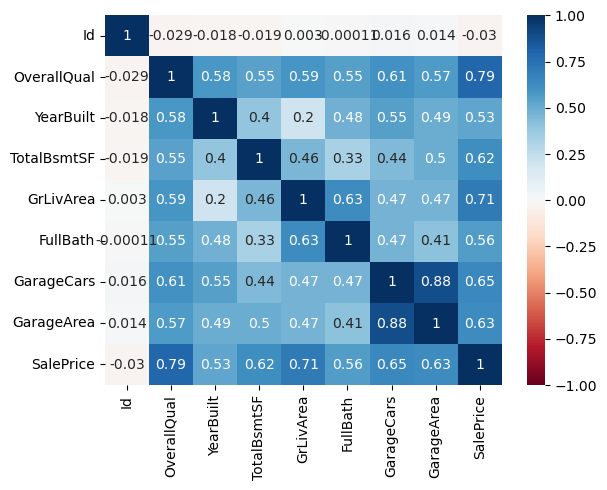

In [9]:
# Correlation plot
sns.heatmap(data.select_dtypes(exclude='object').corr(),vmax=1,vmin=-1,cmap='RdBu',annot=True)

In [10]:
data.select_dtypes(exclude='object').corr()['SalePrice'].sort_values(ascending=False)

SalePrice      1.000000
OverallQual    0.791478
GrLivArea      0.709503
GarageCars     0.647676
GarageArea     0.627264
TotalBsmtSF    0.619852
FullBath       0.562269
YearBuilt      0.528006
Id            -0.029967
Name: SalePrice, dtype: float64

In [11]:
# Lets remove id as it makes no sense in the data
del data['Id']

In [12]:
data.columns

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'Electrical', 'GrLivArea',
       'FullBath', 'GarageType', 'GarageCars', 'GarageArea', 'Fence',
       'MiscFeature', 'SalePrice'],
      dtype='object')

### Univariate Analysis on the data

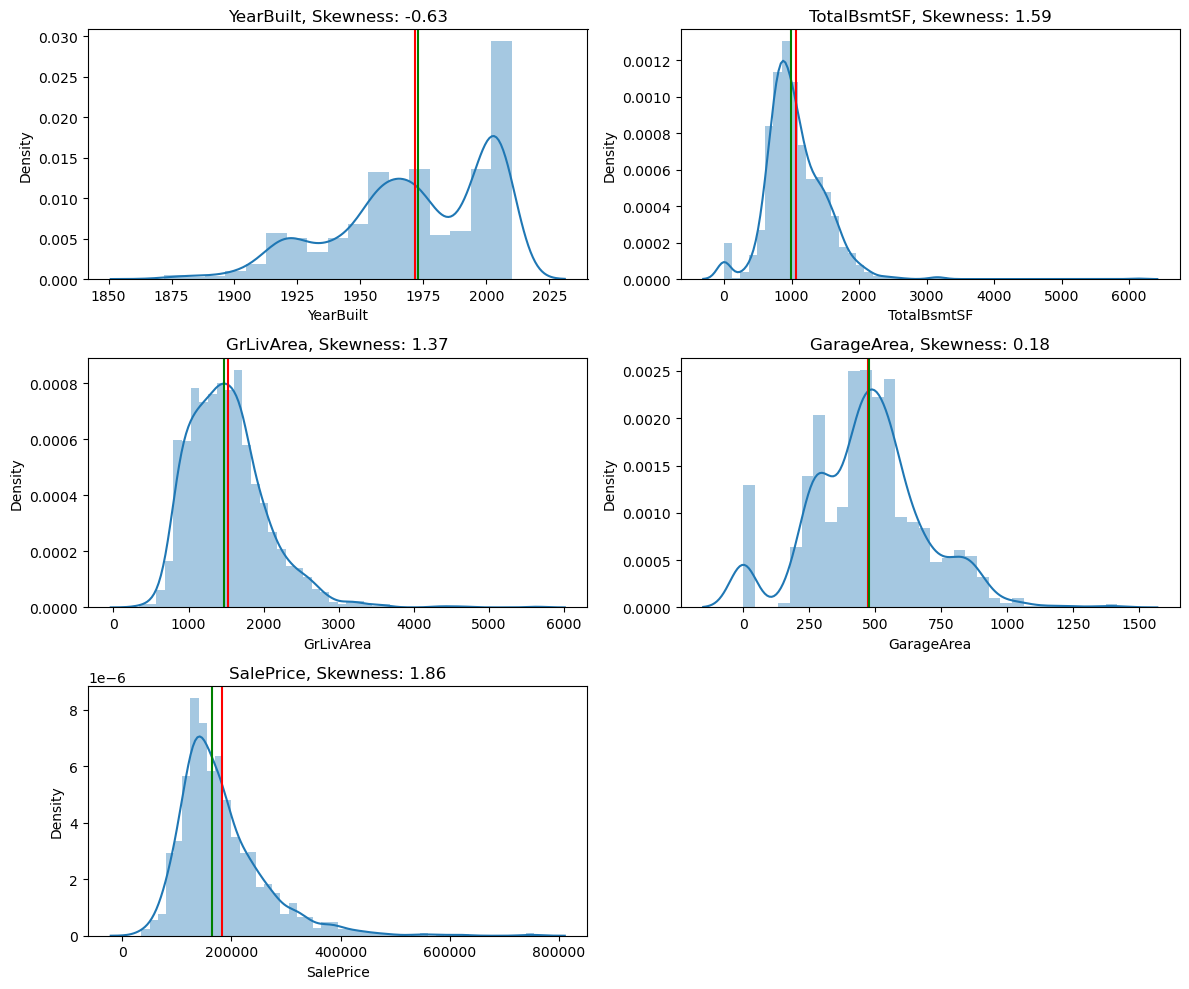

In [13]:
# Number Columns
plt.figure(figsize=(12,10))
t=1
for i in num_cols:
    plt.subplot(3,2,t)
    plt.title(f'{i}, Skewness: {round(data[i].skew(),2)}')
    sns.distplot(data[i])
    plt.axvline(data[i].mean(),color='r')
    plt.axvline(data[i].median(),color='g')
    t+=1
plt.tight_layout()
plt.show()

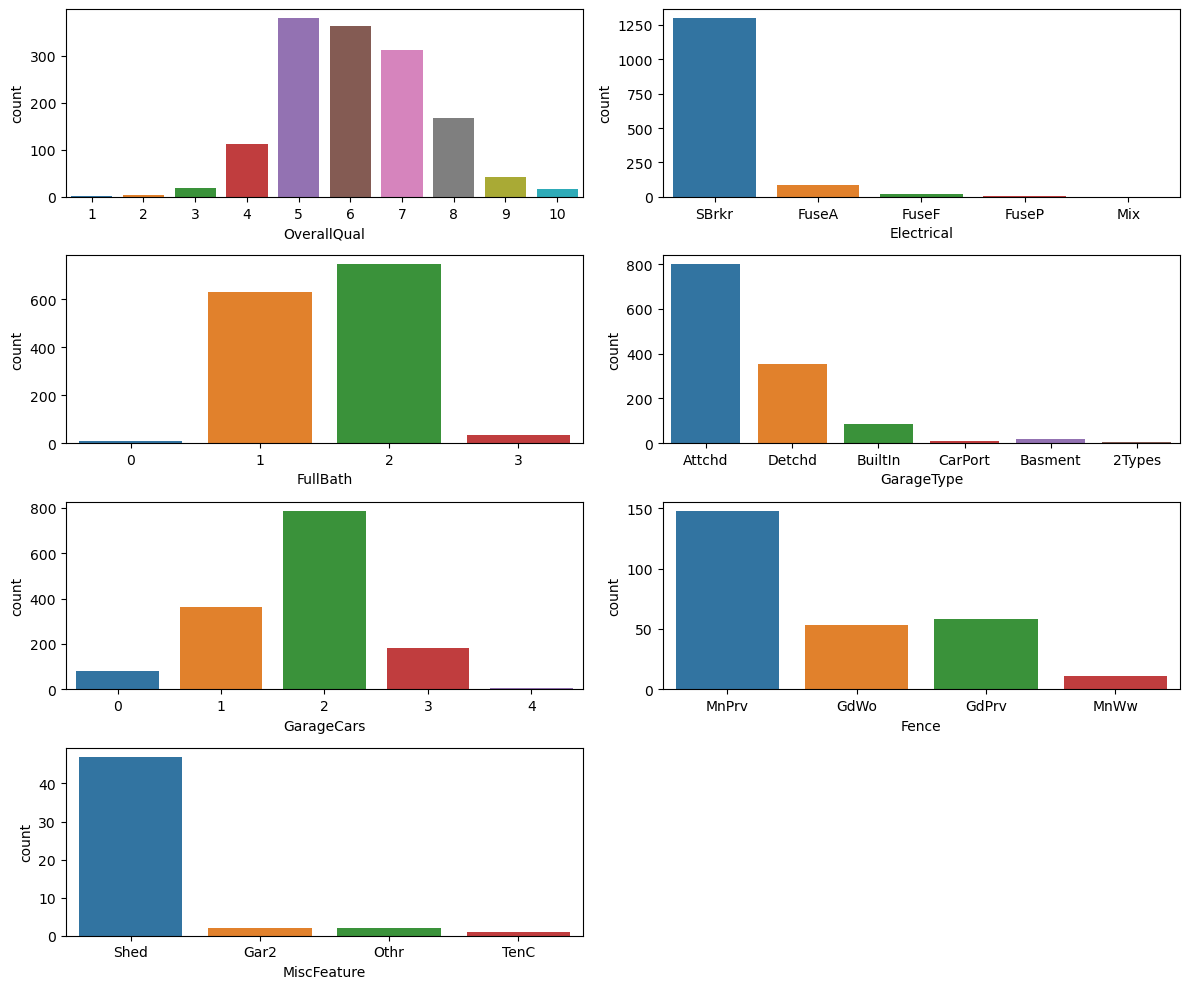

In [14]:
# Category columns
plt.figure(figsize=(12,10))
t = 1
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.countplot(data = data,x=i)
    t+=1
plt.tight_layout()
plt.show()

### Bivaraite Analysis

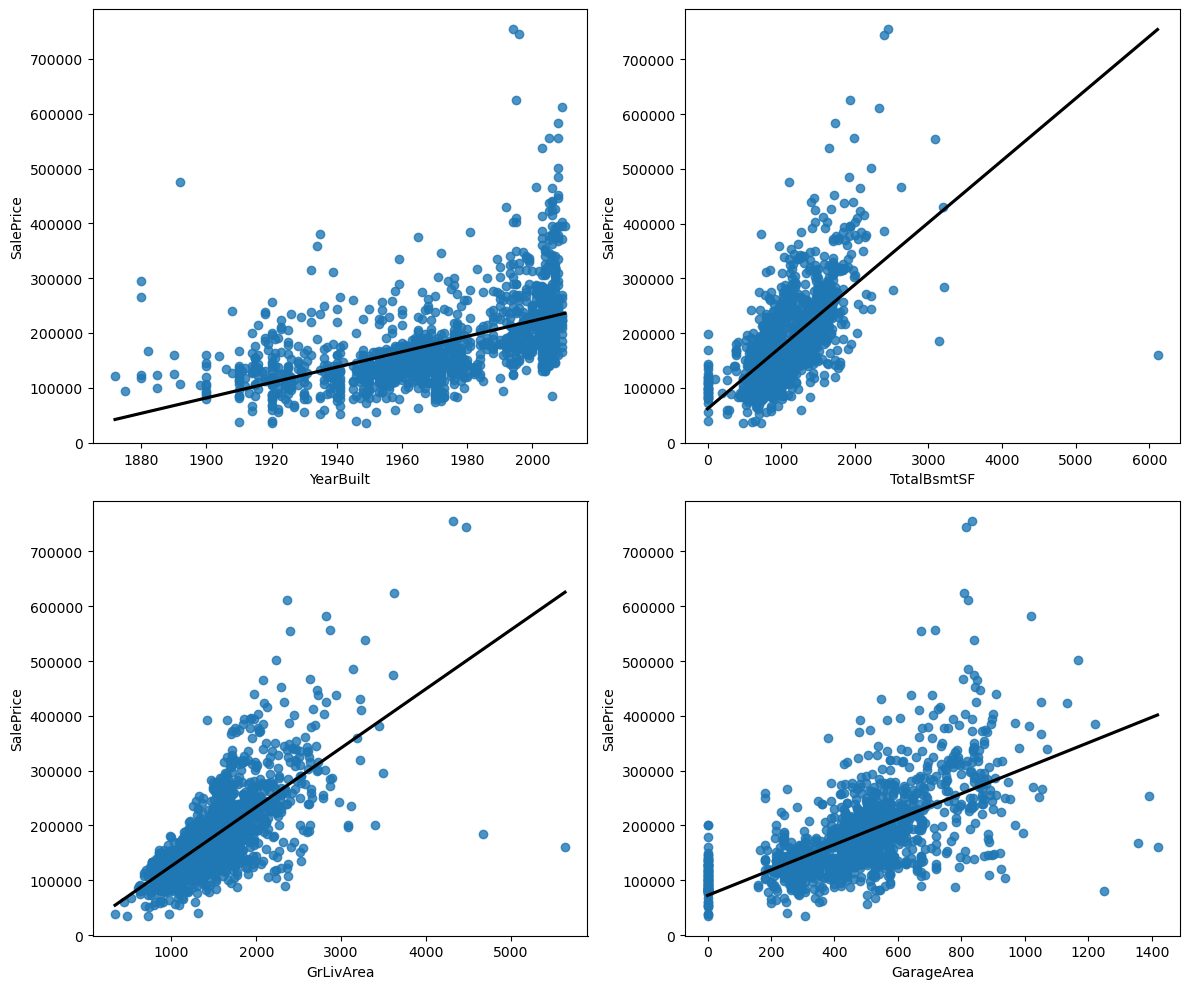

In [15]:
# Number Vs Number
plt.figure(figsize=(12,10))
t=1
for i in num_cols:
    if i != 'SalePrice':
        plt.subplot(2,2,t)
        sns.regplot(y=data['SalePrice'],x=data[i],ci=0,line_kws={'color':'black'})
        t+=1
plt.tight_layout()
plt.show()
        

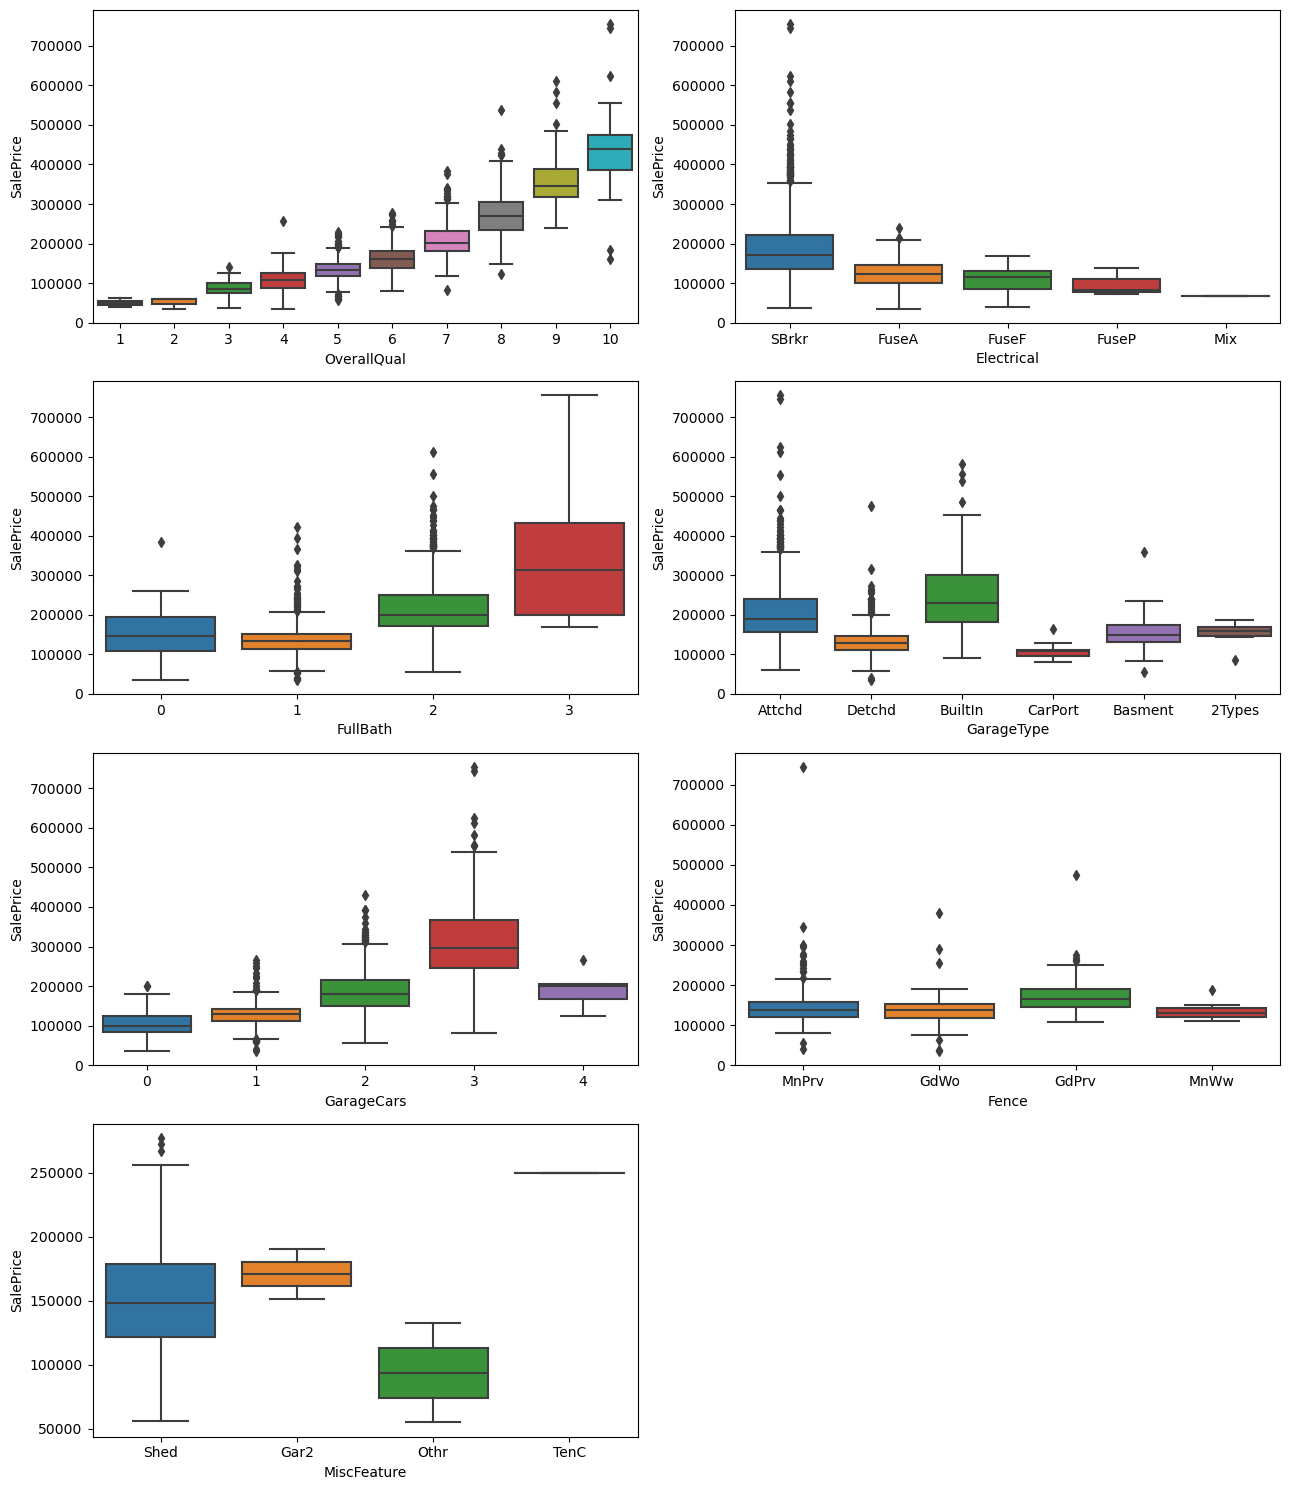

In [16]:
# Number Vs Category
plt.figure(figsize=(13,15))
t = 1
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.boxplot(data=data,x=i,y='SalePrice')
    t+=1
plt.tight_layout()
plt.show()

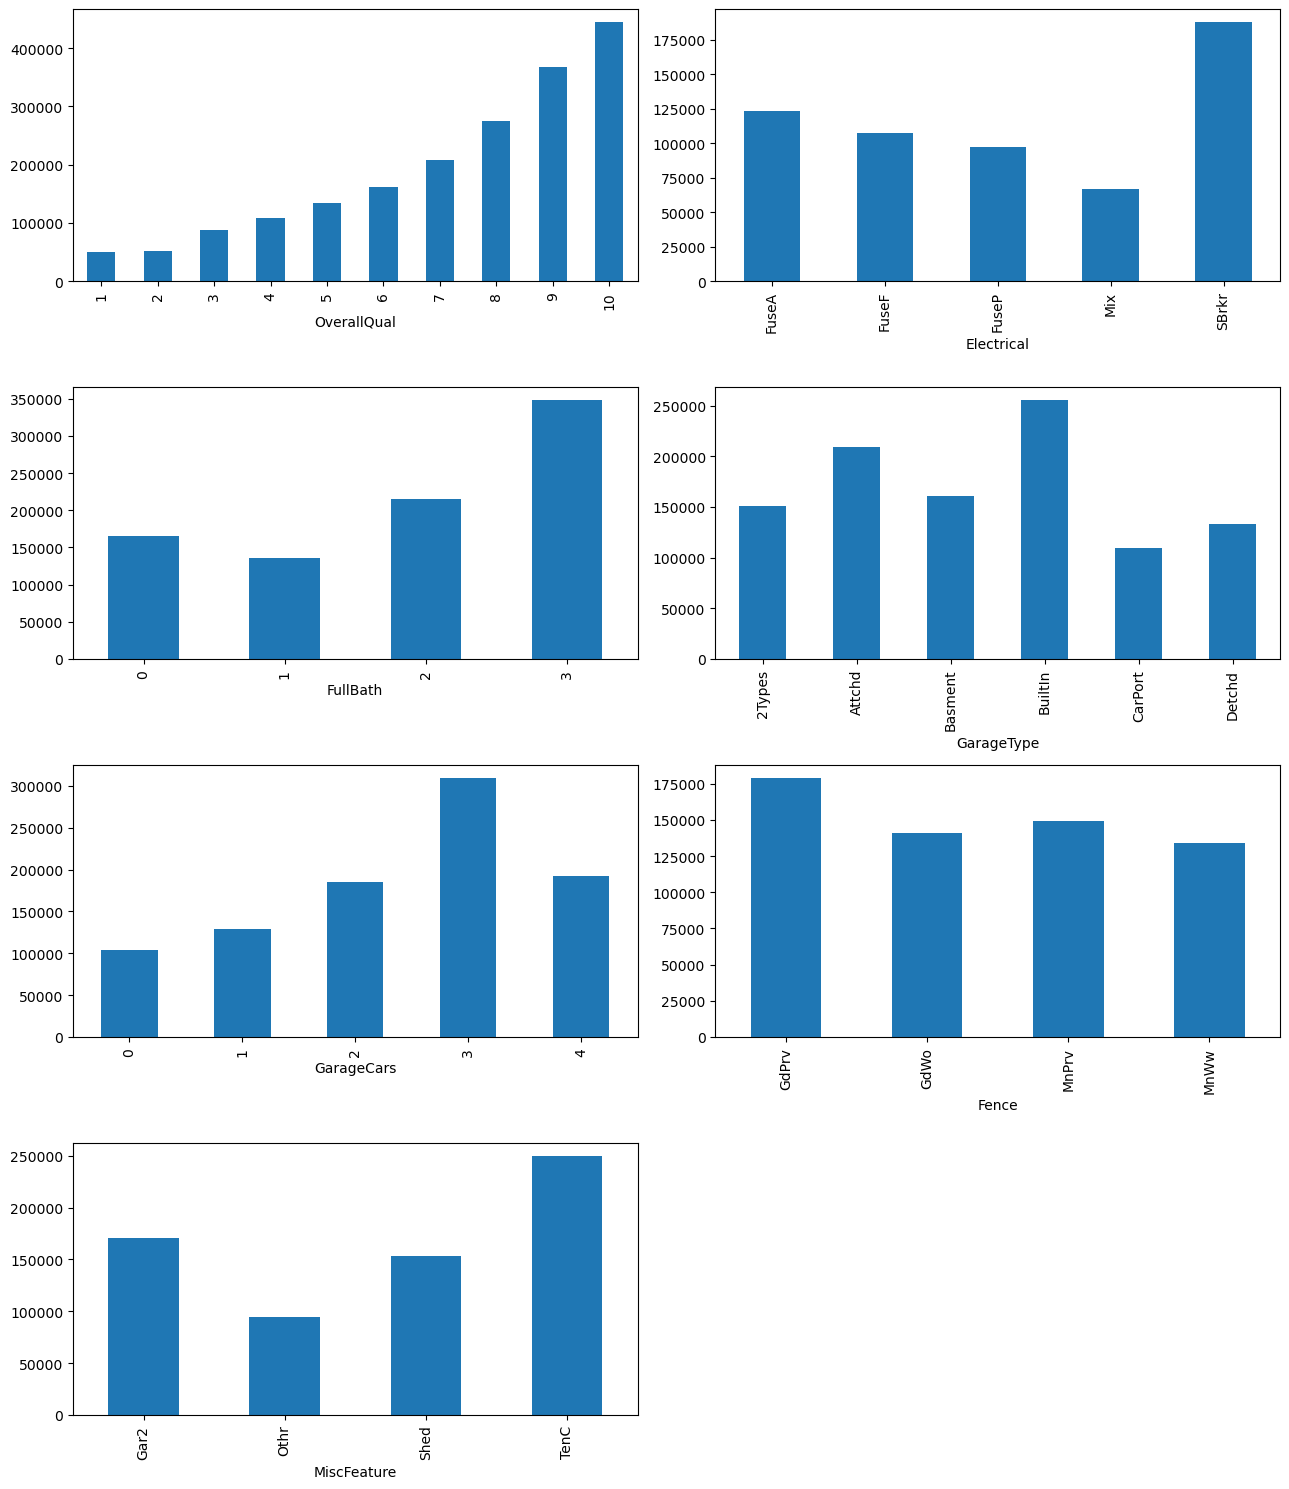

In [17]:
plt.figure(figsize=(13,15))
t = 1
for i in cat_cols:
    plt.subplot(4,2,t)
    data.groupby(by=i)['SalePrice'].mean().plot(kind='bar')
    t+=1
plt.tight_layout()
plt.show()

### Satistical Analysis

#### Key Inferences
* YearBuilt, GrLivArea, TotalBsmtSF and GarageArea are related to the slae price
* BuiltQual, Electrical, FullBath, GarageType and GarageCars are affecting the SalePrice 

In [18]:
# Lets explore yearbuilt and Saleprice statistically

In [19]:
# Assumptions : Data must be normal

# Ho: The data is normal
# Ha: The data is not normal


print(stats.shapiro(data['SalePrice']))
print(stats.shapiro(data['YearBuilt']))

# Since both pvalues are less than 0.05 we have to reject Ho. SO we can go with spearman's correlation
# test (non parametric)

ShapiroResult(statistic=0.8717886209487915, pvalue=1.371634693338205e-32)
ShapiroResult(statistic=0.9247534275054932, pvalue=4.7268936789807727e-26)


In [20]:
# Spearman's correlation test
# Ho: Samples are independent
# Ha: Samples are dependent

print(stats.spearmanr(data['SalePrice'],data['YearBuilt']))

SignificanceResult(statistic=0.6554334366989801, pvalue=7.731685842769625e-175)


In [21]:
for i in num_cols:
    if i != 'SalePrice':
        print(stats.spearmanr(data['SalePrice'],data[i]))

SignificanceResult(statistic=0.6554334366989801, pvalue=7.731685842769625e-175)
SignificanceResult(statistic=0.610789140940605, pvalue=9.424659979319682e-146)
SignificanceResult(statistic=0.7352976571006725, pvalue=1.7737764527778764e-241)
SignificanceResult(statistic=0.6598555665561451, pvalue=5.419048779956526e-178)


In [22]:
# Lets proove statistically the affect of garagetype on Saleprice

In [23]:
data['GarageType'].unique()

array(['Attchd', 'Detchd', nan, 'BuiltIn', 'CarPort', 'Basment', '2Types'],
      dtype=object)

In [24]:
# Kruskal Walli's Test
# Ho: mu1=mu2=...mu6
# Ha: atleast one mean is different

s1 = data[data['GarageType']=='Attchd']['SalePrice']
s2 = data[data['GarageType']=='Detchd']['SalePrice']
s3 = data[data['GarageType']=='BuiltIn']['SalePrice']
s4 = data[data['GarageType']=='CarPort']['SalePrice']
s5 = data[data['GarageType']=='Basment']['SalePrice']
s6 = data[data['GarageType']=='2Types']['SalePrice']

print(stats.kruskal(s1,s2,s3,s4,s5,s6))

KruskalResult(statistic=440.6623751087267, pvalue=5.0735517569761e-93)


## Data Preprocessing

### Feature Engineering

In [25]:
# We will create  a new column age by assuming the tha data was collected
# in 2010. We will subtract 2010 and yearbuilt.

data['Age'] = 2010 - data['YearBuilt']

data.drop(columns=['YearBuilt'],inplace=True)
data.head(2)

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
0,7,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500,7
1,6,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500,34


<Axes: xlabel='SalePrice', ylabel='Age'>

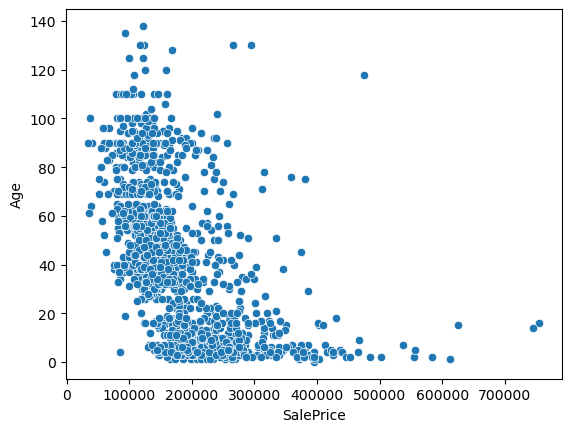

In [26]:
sns.scatterplot(x=data['SalePrice'],y=data['Age'])

In [27]:
data[['SalePrice','Age']].corr()

,SalePrice,Age
SalePrice,1.000000,-0.528006
Age,-0.528006,1.000000


### Missing Values

In [28]:
missing_pec = ((data.isnull().sum()/data.shape[0])*100).sort_values(ascending=False)

In [29]:
missing_pec[missing_pec>0]

MiscFeature    96.332863
Fence          80.959097
GarageType     10.084626
Electrical      0.070522
dtype: float64

In [30]:
# Missing value Value

# Closest fit
# Central Value imputation
# Deletion (Lot of data is missing in a column or very few rows in the data
# has missing columns)

In [31]:
# Lets treat the missing value in Electrical

data[data['Electrical'].isnull()]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
1339,5,384,NaN,1394,2,BuiltIn,2,400,NaN,NaN,167500,4


In [32]:
# Central value imputation
data['Electrical'].fillna(data['Electrical'].mode()[0],inplace=True)

In [33]:
data[data['Electrical'].isnull()]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age


In [34]:
data.groupby(by='GarageCars')['GarageType'].describe(include=object)

,count,unique,top,freq
GarageCars,,,,
0,0,0,NaN,NaN
1,302,5,Detchd,178
2,787,6,Attchd,556
3,181,4,Attchd,138
4,5,3,Detchd,3


In [35]:
# Lets treat missing values in GarageType
data[data['GarageType'].isnull()]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
8,5,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000,71
22,5,1060,SBrkr,1060,1,NaN,1,270,MnPrv,NaN,154000,42
26,5,1484,SBrkr,1600,1,NaN,1,319,NaN,NaN,207500,53
37,4,0,FuseP,1152,2,NaN,0,0,NaN,NaN,82000,55
39,5,1350,SBrkr,1328,1,NaN,1,308,NaN,NaN,170000,51
...,...,...,...,...,...,...,...,...,...,...,...,...
1387,5,788,SBrkr,804,1,NaN,1,240,MnPrv,NaN,119000,70
1407,5,630,SBrkr,630,1,NaN,0,0,NaN,NaN,92000,40
1408,5,896,SBrkr,1792,2,NaN,0,0,NaN,NaN,136000,36
1411,5,1140,SBrkr,1140,1,NaN,0,0,NaN,NaN,84500,4


In [36]:
# Lets impute the missing values where garage area and garage cars are 0
# with new category 'NoGarage'

data['GarageType'] = np.where((data['GarageArea']==0)&(data['GarageCars']==0),
                             'NoGarage',
                             data['GarageType'])

In [37]:
data[data['GarageType'].isnull()]['GarageCars'].value_counts()

GarageCars
1    62
Name: count, dtype: int64

In [38]:
# Since mode of GarageType where garageCars is 1 is 'Detchd'
data['GarageType'].fillna('Detchd',inplace=True)

In [39]:
data[data['GarageType'].isnull()]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age


In [40]:
data.GarageType.value_counts()

GarageType
Attchd      800
Detchd      416
BuiltIn      87
NoGarage     81
Basment      19
CarPort       9
2Types        6
Name: count, dtype: int64

In [41]:
# Lets treat missing values in Fence
data['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [42]:
# Lets bin this data into 0-Fence not present, 1-Fence present

data['Fence'] = np.where(data['Fence'].isnull(),0,1)

In [43]:
data['Fence'].value_counts()

Fence
0    1148
1     270
Name: count, dtype: int64

In [44]:
# Lets validate this statically
# Ho: The samples are independent
# Ha: The samples are dependent

stats.mannwhitneyu(data[data['Fence']==0]['SalePrice'],
                  data[data['Fence']==1]['SalePrice'])

MannwhitneyuResult(statistic=201362.0, pvalue=1.842459050609252e-14)

<Axes: xlabel='Fence', ylabel='SalePrice'>

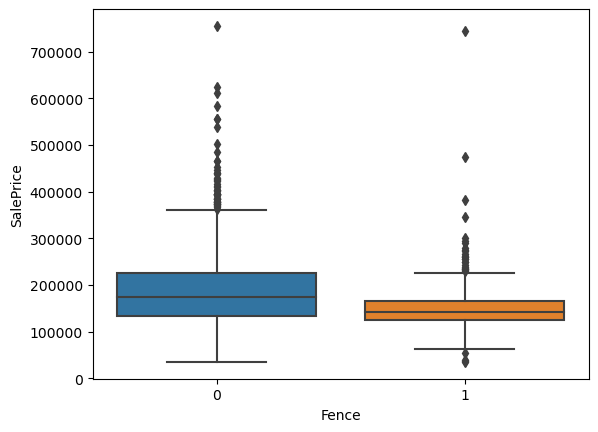

In [45]:
sns.boxplot(x=data['Fence'],y=data['SalePrice'])

In [46]:
# Lets treat missing values in MiscFeature
data['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [47]:
# Lets assume Nan's here means no Misc Feature
# 1 - MiscFeature Yes
# 0 - MiscFeature No
data['MiscFeature'] = np.where(data['MiscFeature'].isnull(),0,1)
data['MiscFeature'].value_counts()

MiscFeature
0    1366
1      52
Name: count, dtype: int64

In [48]:
# Lets validate this statically
# Ho: The samples are independent
# Ha: The samples are dependent

stats.mannwhitneyu(data[data['MiscFeature']==0]['SalePrice'],
                  data[data['MiscFeature']==1]['SalePrice'])

MannwhitneyuResult(statistic=42639.5, pvalue=0.013980740442174016)

<Axes: xlabel='MiscFeature'>

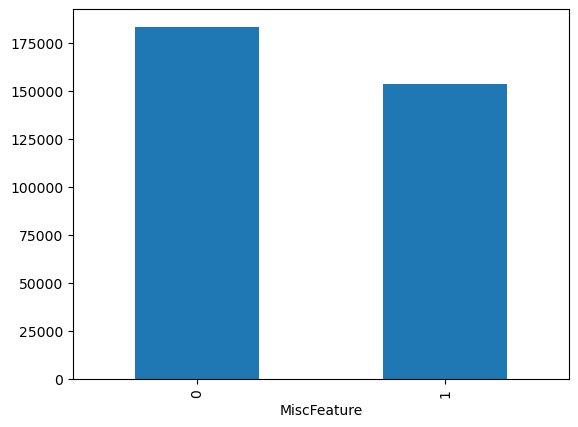

In [49]:
data.groupby(by='MiscFeature')['SalePrice'].mean().plot(kind='bar')

In [50]:
data.isnull().sum()

OverallQual    0
TotalBsmtSF    0
Electrical     0
GrLivArea      0
FullBath       0
GarageType     0
GarageCars     0
GarageArea     0
Fence          0
MiscFeature    0
SalePrice      0
Age            0
dtype: int64

### Outlier Treatment

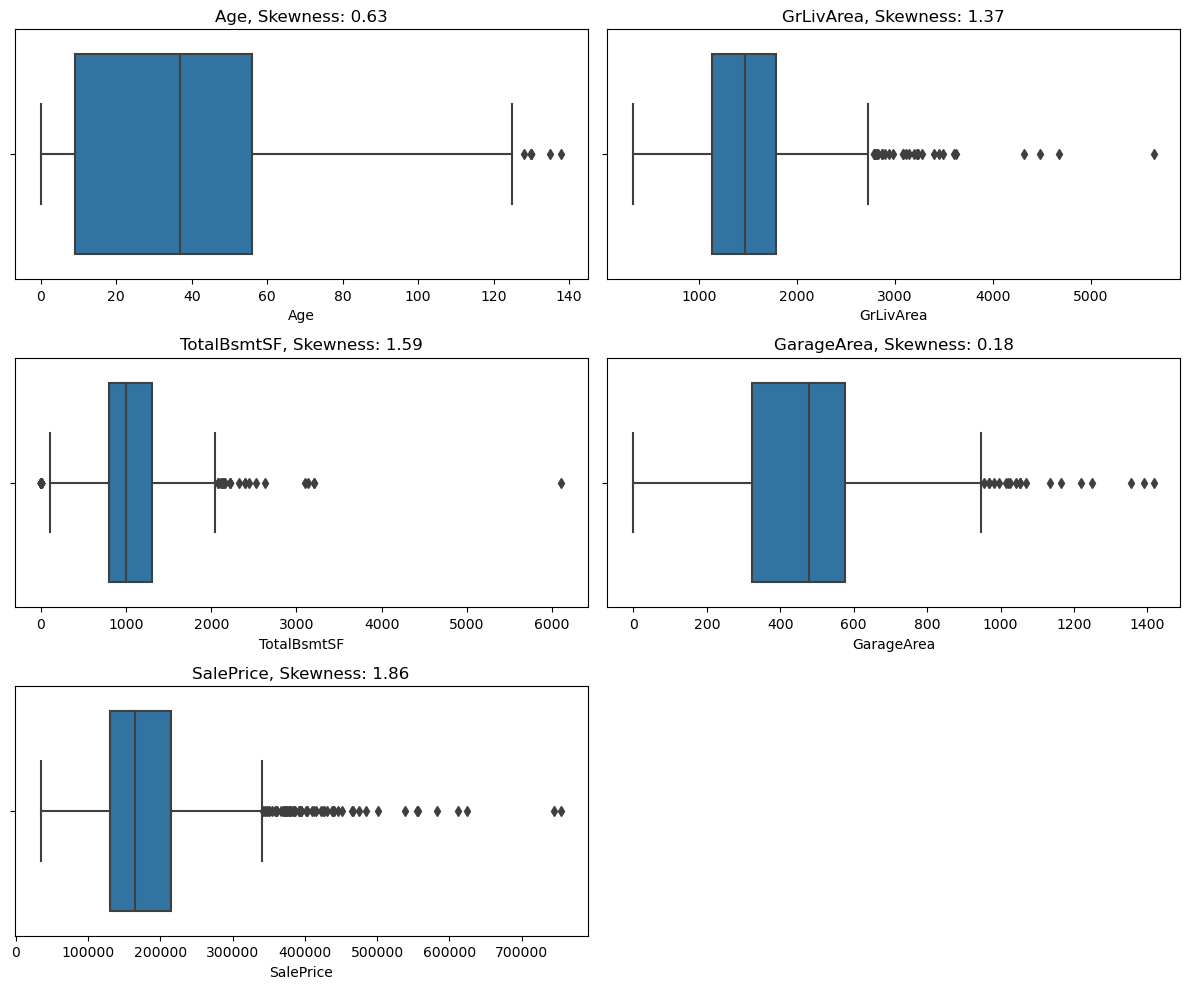

In [51]:
plt.figure(figsize=(12,10))
t=1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea','SalePrice']:
    plt.subplot(3,2,t)
    plt.title(f'{i}, Skewness: {round(data[i].skew(),2)}')
    sns.boxplot(x=data[i],orient='h')
    t+=1
plt.tight_layout()
plt.show()

In [52]:
data[data['TotalBsmtSF']>6000]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
1260,10,6110,SBrkr,5642,2,Attchd,2,1418,0,0,160000,2


In [53]:
data[data['GrLivArea']>5000]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
1260,10,6110,SBrkr,5642,2,Attchd,2,1418,0,0,160000,2


In [54]:
data[data['SalePrice']>700000]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
665,10,2444,SBrkr,4316,3,Attchd,3,832,0,0,755000,16
1147,10,2396,SBrkr,4476,3,Attchd,3,813,1,0,745000,14


In [55]:
data.drop(index=[1260],inplace=True)

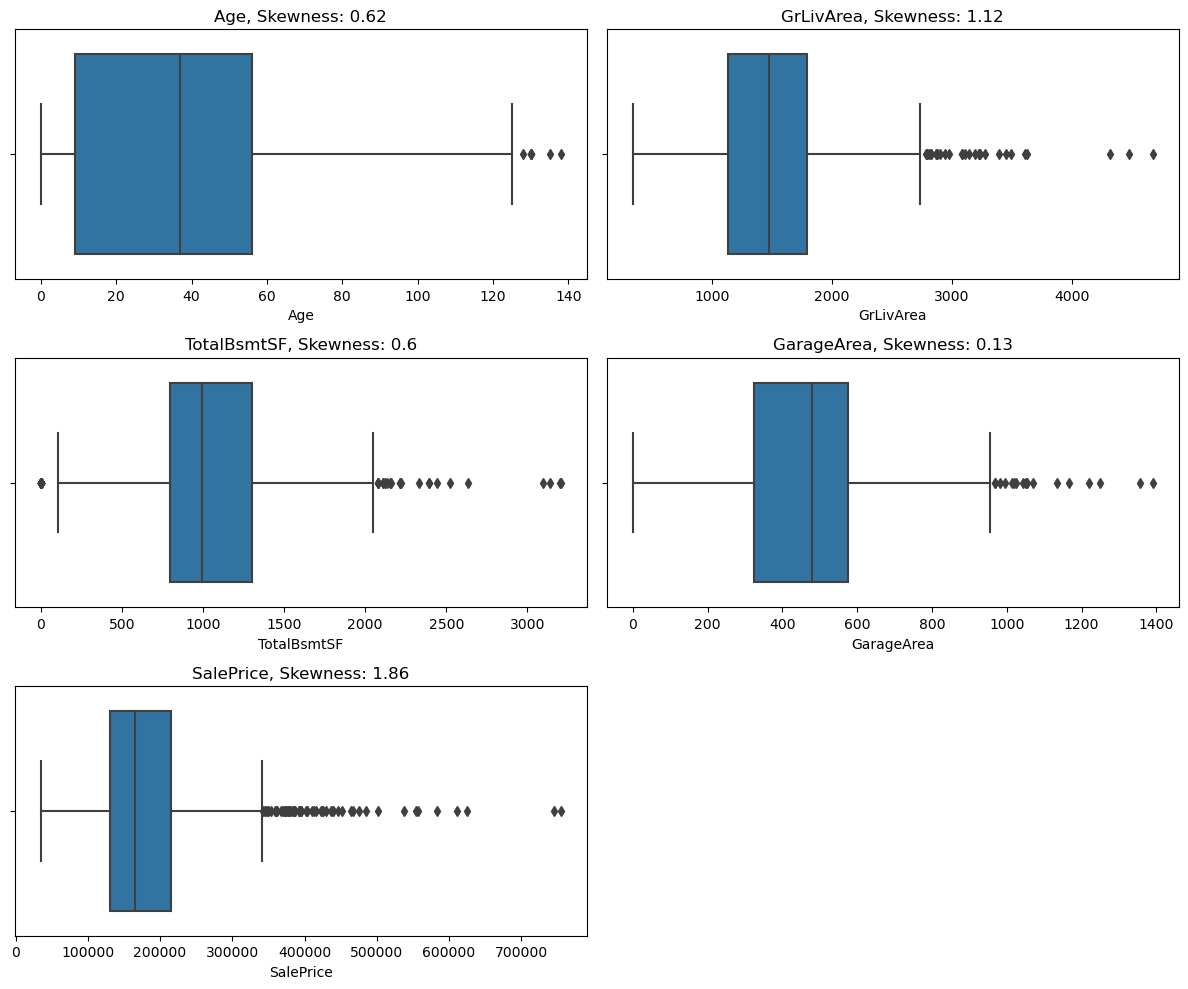

In [56]:
plt.figure(figsize=(12,10))
t=1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea','SalePrice']:
    plt.subplot(3,2,t)
    plt.title(f'{i}, Skewness: {round(data[i].skew(),2)}')
    sns.boxplot(x=data[i],orient='h')
    t+=1
plt.tight_layout()
plt.show()

In [57]:
# Cap the outliers
# Remove the outliers

In [58]:
# Lets cap the outliers to 99th percentile in GarageArea,
# TotalbsmtSF, GrLivArea

for i in ['GarageArea','TotalBsmtSF','GrLivArea']:
    ul = np.percentile(data[i],99)
    data[i] = np.where(data[i]>ul,ul,data[i])

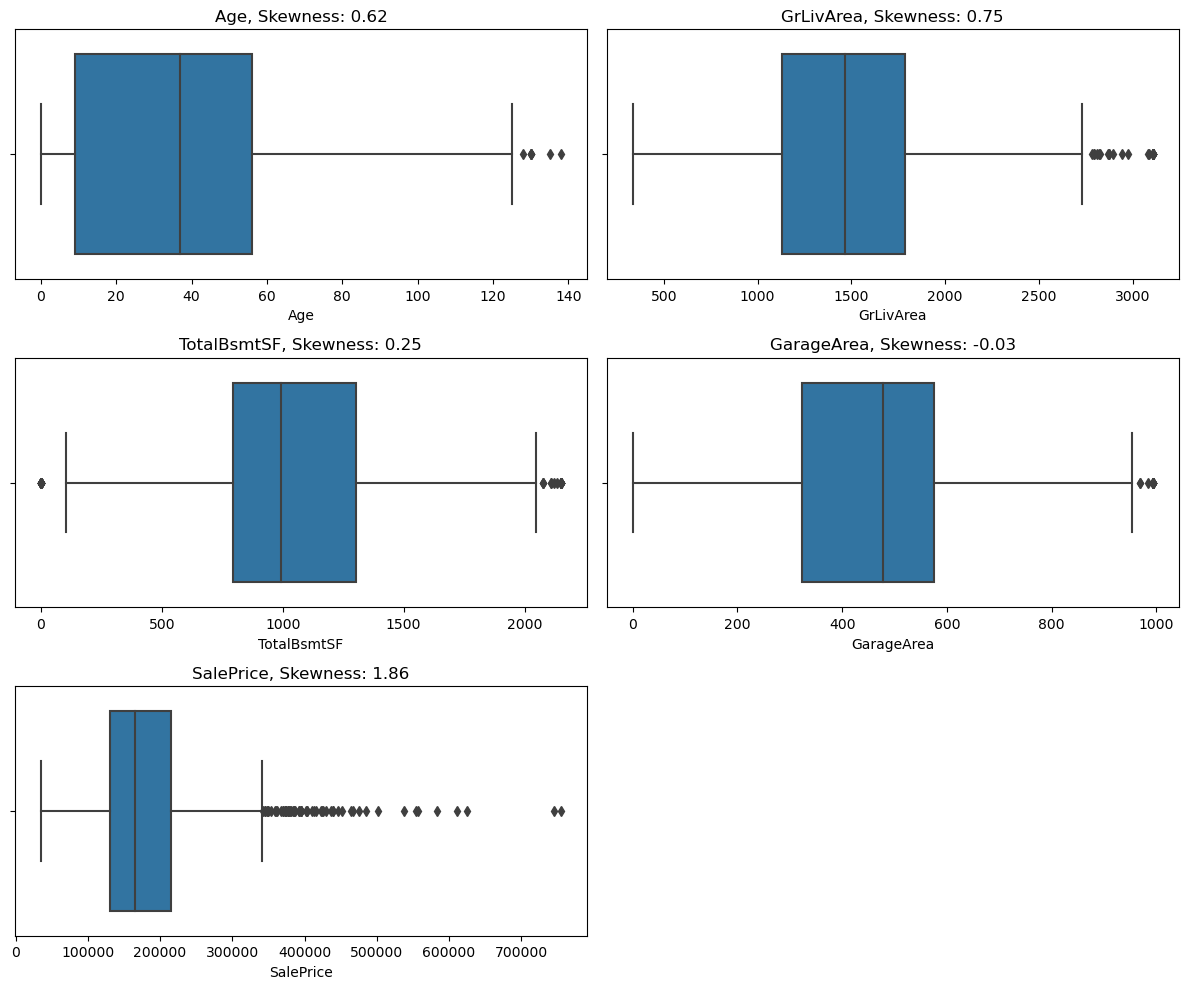

In [59]:
plt.figure(figsize=(12,10))
t=1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea','SalePrice']:
    plt.subplot(3,2,t)
    plt.title(f'{i}, Skewness: {round(data[i].skew(),2)}')
    sns.boxplot(x=data[i],orient='h')
    t+=1
plt.tight_layout()
plt.show()

### Encoding

In [60]:
data.head(2)

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
0,7,856.0,SBrkr,1710.0,2,Attchd,2,548.0,0,0,208500,7
1,6,1262.0,SBrkr,1262.0,2,Attchd,2,460.0,0,0,181500,34


In [61]:
data['Electrical'].value_counts()

Electrical
SBrkr    1300
FuseA      89
FuseF      24
FuseP       3
Mix         1
Name: count, dtype: int64

In [62]:
data['Electrical'] = np.where(data['Electrical']=='SBrkr',1,0)
data.head()

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
0,7,856.0,1,1710.0,2,Attchd,2,548.0,0,0,208500,7
1,6,1262.0,1,1262.0,2,Attchd,2,460.0,0,0,181500,34
2,7,920.0,1,1786.0,2,Attchd,2,608.0,0,0,223500,9
3,7,756.0,1,1717.0,1,Detchd,3,642.0,0,0,140000,95
4,8,1145.0,1,2198.0,2,Attchd,3,836.0,0,0,250000,10


In [63]:
data['GarageType'].value_counts()

GarageType
Attchd      799
Detchd      416
BuiltIn      87
NoGarage     81
Basment      19
CarPort       9
2Types        6
Name: count, dtype: int64

In [64]:
def garagetype(s):
    if s in ['Basment','CarPort','2Types']:
        return 'Others'
    else:
        return s

In [65]:
data['GarageType'] = data['GarageType'].apply(garagetype)

In [66]:
data['GarageType'].value_counts()

GarageType
Attchd      799
Detchd      416
BuiltIn      87
NoGarage     81
Others       34
Name: count, dtype: int64

In [67]:
dicti = round(data.groupby(by='GarageType')['SalePrice'].mean(),0).to_dict()

In [68]:
dicti

{'Attchd': 208760.0,
 'BuiltIn': 255680.0,
 'Detchd': 133853.0,
 'NoGarage': 103317.0,
 'Others': 145535.0}

In [69]:
data['GarageType'] = data['GarageType'].map(dicti)

In [70]:
data.head(2)

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
0,7,856.0,1,1710.0,2,208760.0,2,548.0,0,0,208500,7
1,6,1262.0,1,1262.0,2,208760.0,2,460.0,0,0,181500,34


<Axes: xlabel='GarageType', ylabel='SalePrice'>

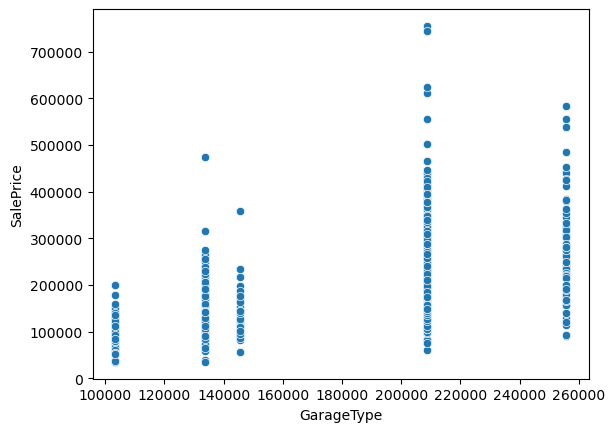

In [71]:
sns.scatterplot(y=data['SalePrice'],x=data['GarageType'])

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1417 entries, 0 to 1417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OverallQual  1417 non-null   int64  
 1   TotalBsmtSF  1417 non-null   float64
 2   Electrical   1417 non-null   int32  
 3   GrLivArea    1417 non-null   float64
 4   FullBath     1417 non-null   int64  
 5   GarageType   1417 non-null   float64
 6   GarageCars   1417 non-null   int64  
 7   GarageArea   1417 non-null   float64
 8   Fence        1417 non-null   int32  
 9   MiscFeature  1417 non-null   int32  
 10  SalePrice    1417 non-null   int64  
 11  Age          1417 non-null   int64  
dtypes: float64(4), int32(3), int64(5)
memory usage: 127.3 KB


In [73]:
data

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
0,7,856.0,1,1710.0,2,208760.0,2,548.0,0,0,208500,7
1,6,1262.0,1,1262.0,2,208760.0,2,460.0,0,0,181500,34
2,7,920.0,1,1786.0,2,208760.0,2,608.0,0,0,223500,9
3,7,756.0,1,1717.0,1,133853.0,3,642.0,0,0,140000,95
4,8,1145.0,1,2198.0,2,208760.0,3,836.0,0,0,250000,10
...,...,...,...,...,...,...,...,...,...,...,...,...
1413,6,953.0,1,1647.0,2,208760.0,2,460.0,0,0,175000,11
1414,6,1542.0,1,2073.0,2,208760.0,2,500.0,1,0,210000,32
1415,7,1152.0,1,2340.0,2,208760.0,1,252.0,1,1,266500,69
1416,5,1078.0,0,1078.0,1,133853.0,1,240.0,0,0,142125,60


In [74]:
y= data.SalePrice
x= data.loc[:,['OverallQual','TotalBsmtSF','Electrical','GrLivArea','GarageType','GarageCars','GarageArea','Fence','MiscFeature','Age']]

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.20,random_state=1)

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
lr= LinearRegression()

In [79]:
pred_train=lr.fit(xtrain,ytrain).predict(xtrain)
pred_test=lr.fit(xtrain,ytrain).predict(xtest)

In [80]:
from sklearn.metrics import mean_squared_error

rmse_train= np.sqrt(mean_squared_error(ytrain,pred_train))
rmse_test= np.sqrt(mean_squared_error(ytest,pred_test))

In [81]:
print(rmse_train,rmse_test)

36114.83741590503 36907.971211670905


In [82]:
import statsmodels.formula.api as sfa
import statsmodels.api as sma

In [83]:
model= sfa.ols('SalePrice ~ OverallQual+TotalBsmtSF+Electrical+GrLivArea+GarageType+GarageCars+GarageArea+Fence+MiscFeature+Age',data).fit()

In [84]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     543.3
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:42:55   Log-Likelihood:                -16887.
No. Observations:                1417   AIC:                         3.380e+04
Df Residuals:                    1406   BIC:                         3.385e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -7.571e+04   8806.619     -8.597      0.000    -9.3e+04   -5.84e+04
OverallQual  1.905e+04   1134.109     16.795      0.000    1.68e+04    2.13e+04
TotalBsmtSF    44.0859      3.020     14.599      0.000      38.162      50.009
Electrical   -902.3513   3783.494     -0.238      0.812   -8324.252    6519.550
GrLivArea      57.1749      2.644     21.623      0.000      51.988      62.362
GarageType     -0.0092      0.032     -0.286      0.775      -0.072       0.054
GarageCars   2566.5441   3104.720      0.827      0.409   -3523.839    8656.927
GarageArea     37.9434     10.533      3.602      0.000      17.282      58.605
Fence         380.0253   2571.299      0.148      0.883   -4663.970    5424.021
MiscFeature  1730.1572   5211.053      0.332      0.740   -8492.119     1.2e+04
Age          -299.6740     49.483     -6.056      0.000    -396.743    -202.605
==============================================================================
Omnibus:                      691.071   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14722.271
Skew:                           1.771   Prob(JB):                         0.00
Kurtosis:                      18.389   Cond. No.                     1.73e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Now, trying regularization

In [85]:
model.params

Intercept     -75709.133729
OverallQual    19047.008202
TotalBsmtSF       44.085898
Electrical      -902.351281
GrLivArea         57.174907
GarageType        -0.009174
GarageCars      2566.544069
GarageArea        37.943369
Fence            380.025261
MiscFeature     1730.157180
Age             -299.674020
dtype: float64

<Axes: >

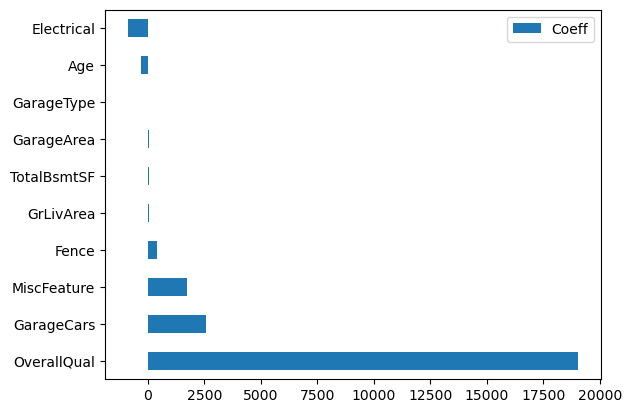

In [86]:
pd.DataFrame(model.params[1:],index=x.columns,columns=['Coeff']).sort_values(ascending=False,by=['Coeff']).plot(kind='barh')

In [87]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()

In [88]:
rf.fit(x,y)

RandomForestRegressor()

<Axes: >

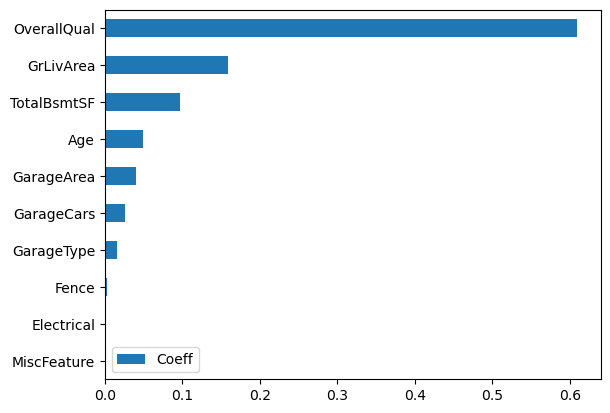

In [89]:
pd.DataFrame(rf.feature_importances_,x.columns,columns=['Coeff']).sort_values(by=['Coeff']).plot(kind='barh')

In [90]:
# import the required libraries

from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [91]:
ridge= Ridge(alpha=1,random_state=0)
lasso= Lasso(alpha=1,random_state=0)

# fit the model and plot the coefficients

pred_ridge= ridge.fit(x,y).predict(x) # using ridge regression
pred_lasso= lasso.fit(x,y).predict(x) # using lasso regression

<Axes: >

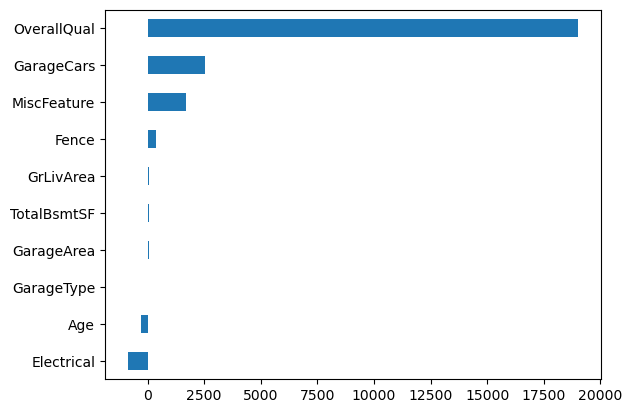

In [92]:
# Plot the coefficients

pd.Series(ridge.coef_,x.columns).sort_values().plot(kind='barh')

<Axes: >

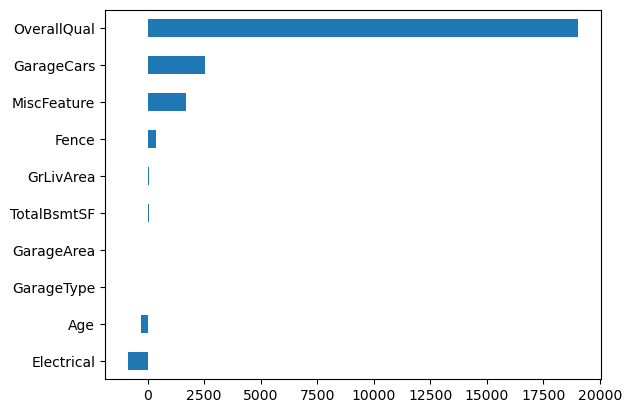

In [93]:
# Plot the coefficients

pd.Series(lasso.coef_,x.columns).sort_values().plot(kind='barh')

In [94]:
lasso.coef_

array([ 1.90454687e+04,  4.40857447e+01, -8.84751514e+02,  5.71766064e+01,
       -9.14077219e-03,  2.55564018e+03,  3.79730762e+01,  3.72780905e+02,
        1.70038918e+03, -2.99634548e+02])

In [95]:
ridge.coef_

array([ 1.90286963e+04,  4.40960694e+01, -8.89130387e+02,  5.71948865e+01,
       -9.11375084e-03,  2.55239896e+03,  3.79946957e+01,  3.77158482e+02,
        1.68957114e+03, -2.99934188e+02])

In [96]:
x.columns

Index(['OverallQual', 'TotalBsmtSF', 'Electrical', 'GrLivArea', 'GarageType',
       'GarageCars', 'GarageArea', 'Fence', 'MiscFeature', 'Age'],
      dtype='object')

<Axes: >

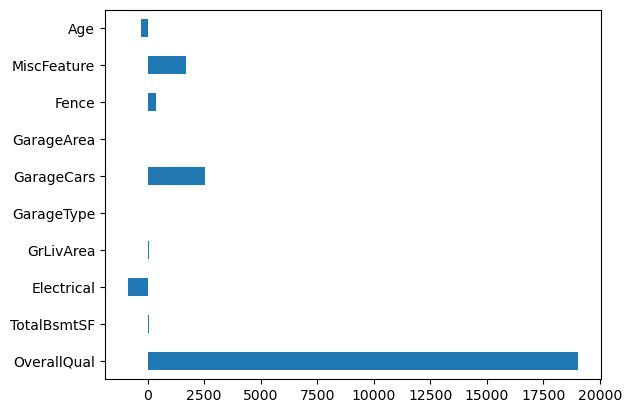

In [98]:
pd.Series(lasso.coef_,x.columns).plot(kind='barh')